### Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

### Import required shapefile

In [2]:
# Let's import the .shp file that represents the 52 districts of South Africa
za = gpd.read_file("gadm36_ZAF_2.shp")

### Get the center points and map
In the original shapefiles we have polygons which describe the shape of each district. To place a label on each district we ideally need to find an identifiable point which exists within each polygon so that we can say where we want the text to be placed.

In [3]:
# Here we find the center points, copy our original df to a new df, and then set 
# the geometry column to the newly created center points column 
# (because a GeoPandas df can only have one geometry column)

In [4]:
za["center"] = za["geometry"].centroid
za_points = za.copy()
za_points.set_geometry("center", inplace = True)

9

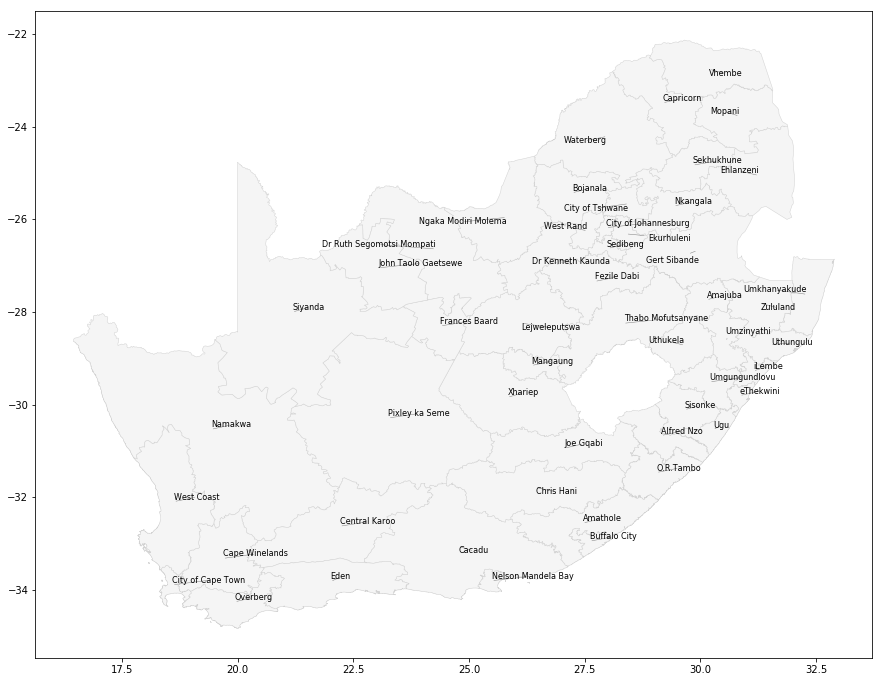

In [5]:
ax = za.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["NAME_2"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

### Get representative points and map
As per the documentation http://geopandas.org/data_structures.html#basic-methods, representative points are guaranteed to be within each geometry but are not centroids. Let's look at the difference:

In [6]:
# Here we find the representative points, copy our original df to a new df, and then set 
# the geometry column to the newly created representative points column 
# (because a GeoPandas df can only have one geometry column)

In [7]:
za["rep"] = za["geometry"].representative_point()
za_points = za.copy()
za_points.set_geometry("rep", inplace = True)

47

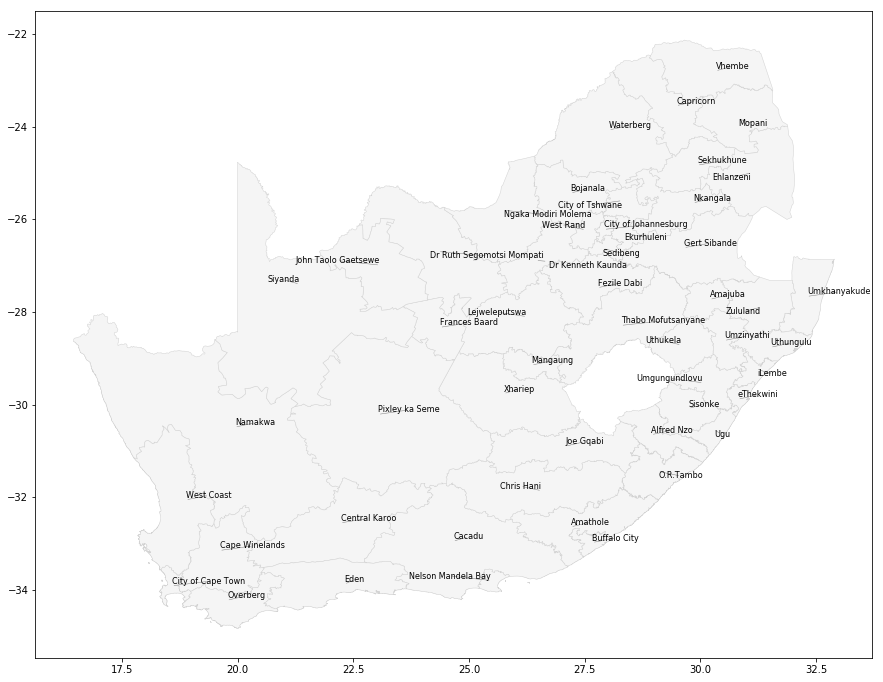

In [8]:
ax = za.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(za_points.geometry.x, za_points.geometry.y, za_points["NAME_2"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
               arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

It's pretty subtle! But if you compare Frances Baard and Lejweleputswa you'll be able to spot the difference :).